In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/production')
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/production


In [0]:
# data transform
#!python data_trans.py

In [4]:
# data split
#os.chdir('/content/drive/My Drive/Colab Notebooks/production/')
!python train_test_split.py
os.listdir('/content/drive/My Drive/Colab Notebooks/production/data/')

['images',
 'labels',
 'classes.names',
 'classes.n',
 'custom.data',
 'train.txt',
 'val.txt',
 '.ipynb_checkpoints']

# New Section

In [17]:
#print(os.listdir('/content/drive/My Drive/Colab Notebooks/production/'))
#!python train.py --weights weights/yolov3-tiny.conv.15 --epochs 500 --batch-size 16
!python train.py --weights weights/last.pt --epochs 150 --batch-size 16

Namespace(accumulate=4, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-tiny.cfg', data='data/custom.data', device='', epochs=150, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Caching labels (2999 found, 0 missing, 0 empty, 0 duplicate, for 2999 images): 100% 2999/2999 [00:03<00:00, 964.64it/s]
Caching labels (333 found, 0 missing, 0 empty, 0 duplicate, for 333 images): 100% 333/333 [00:00<00:00, 904.81it/s]
Model Summary: 37 layers, 8.73687e+06 parameters, 8.73687e+06 gradients
Using 2 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   149/149     1.95G      2.47      1.06      0.67       4.2        23       416: 100% 188/188 [03:19<00:00,  1.06s/it]
       

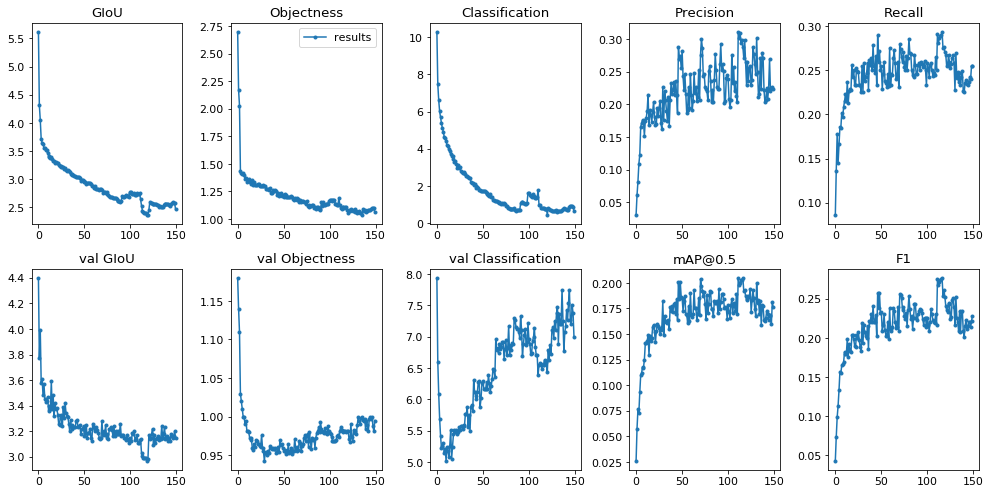

In [18]:
# Vizualization
from utils import utils
utils.plot_results() 

In [19]:
!python3 test.py --weights weights/best.pt

Namespace(batch_size=4, cfg='cfg/yolov3-tiny.cfg', conf_thres=0.001, data='data/custom.data', device='', img_size=416, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 84/84 [00:08<00:00, 10.07it/s]
                 all       333  1.04e+03    0.0262     0.512      0.23    0.0495
             zapatos       333       184    0.0587     0.842      0.53      0.11
          pantalones       333       162    0.0614     0.969     0.712     0.115
           chaquetas       333        88    0.0545     0.977     0.446     0.103
             abrigos       333        44    0.0547     0.818     0.359     0.103
          pendientes       333         6   0.00421     0.333     0.117   0.00832
           sombreros       333        41    0.0303     0.829     0.318    0.0585
             camisas     

In [20]:
!python3 detect.py --weights weights/best.pt

Namespace(agnostic_nms=False, cfg='cfg/yolov3-tiny.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.5, names='data/classes.names', output='output', save_txt=False, source='data/images', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

image 1/3332 data/images/001dxxyile2uxkblr99uqo6fuhgprpccznlze0z0djhs9gkek2tsm8u5hsfzx62o.jpg: 416x416 1 zapatoss, Done. (0.014s)
image 2/3332 data/images/00e9vso7hc2zf31lsbc0830f5ksrzg9lmtrbh8tpgt6lzutyhex8a06lwypms50b.jpg: 256x416 2 camisass, Done. (0.008s)
image 3/3332 data/images/00jmgjtdy2u5whe8uimzw6oci41s2no0msxihqibgepqd4gsrew5wgedlvvfhzbb.jpg: 416x416 1 zapatoss, 1 pantaloness, 1 camisass, Done. (0.009s)
image 4/3332 data/images/00maza290hmmhn7fo5tmh9s2bvyzo36ogxdoqyt14cn4t4uqolyjx63pipd6fb4f.jpg: 416x384 1 camisass, Done. (0.009s)
image 5/3332 data/images/019t1qxtnjl05g51wjfwmbq4pjr6agjqxdgbold21348l85i2hkn7jia2ug7d3y9.jp